In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
from scipy.stats import chisquare
from PIL import Image
from __future__ import print_function
import torch
from torchvision import transforms as T
from torchvision import models

In [3]:
path_jpg = 'C:/Users/bolub/OneDrive/Masaüstü/Ders/Year_4/FYP/pad-ufes-20/images/imgs_process'
img_files = [x for x in os.listdir(path_jpg)]
print(img_files)

['PAT_100_393_595.png.jpg', 'PAT_109_868_113.png.jpg', 'PAT_109_868_723.png.jpg', 'PAT_1107_427_352.png.jpg', 'PAT_1109_436_141.png.jpg', 'PAT_1109_437_254.png.jpg', 'PAT_112_168_360.png.jpg', 'PAT_1138_520_154.png.jpg', 'PAT_1186_680_578.png.jpg', 'PAT_1216_759_542.png.jpg', 'PAT_1217_762_198.png.jpg', 'PAT_122_185_957.png.jpg', 'PAT_1245_844_471.png.jpg', 'PAT_1245_845_32.png.jpg', 'PAT_1252_866_852.png.jpg', 'PAT_1269_936_965.png.jpg', 'PAT_1273_952_89.png.jpg', 'PAT_1288_1003_969.png.jpg', 'PAT_1306_1086_124.png.jpg', 'PAT_1326_1156_139.png.jpg', 'PAT_1326_1156_783.png.jpg', 'PAT_1331_1173_380.png.jpg', 'PAT_1333_1177_434.png.jpg', 'PAT_1334_1178_413.png.jpg', 'PAT_1335_1181_21.png.jpg', 'PAT_1345_1223_175.png.jpg', 'PAT_1350_1230_878.png.jpg', 'PAT_1351_1231_203.png.jpg', 'PAT_1364_1246_143.png.jpg', 'PAT_1364_1246_238.png.jpg', 'PAT_1364_1246_420.png.jpg', 'PAT_1364_1246_447.png.jpg', 'PAT_1364_1246_583.png.jpg', 'PAT_1364_1246_927.png.jpg', 'PAT_1377_3512_370.png.jpg', 'PAT_1379

PAT_100_393_595.png.jpg
PAT_109_868_113.png.jpg
PAT_109_868_723.png.jpg
PAT_1107_427_352.png.jpg
PAT_1109_436_141.png.jpg
PAT_1109_437_254.png.jpg
PAT_112_168_360.png.jpg
PAT_1138_520_154.png.jpg
PAT_1186_680_578.png.jpg
PAT_1216_759_542.png.jpg
PAT_1217_762_198.png.jpg
PAT_122_185_957.png.jpg
PAT_1245_844_471.png.jpg
PAT_1245_845_32.png.jpg
PAT_1252_866_852.png.jpg
PAT_1269_936_965.png.jpg
PAT_1273_952_89.png.jpg
PAT_1288_1003_969.png.jpg
PAT_1306_1086_124.png.jpg
PAT_1326_1156_139.png.jpg


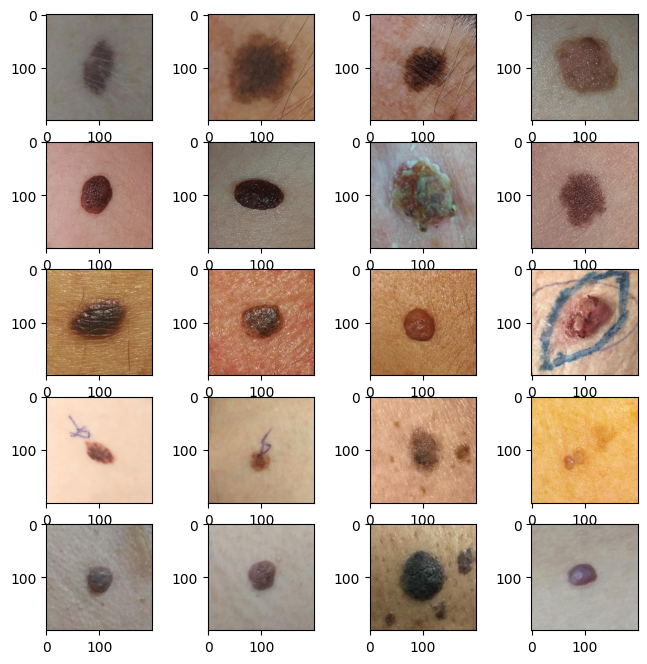

In [4]:
#Original Pictures

fig = plt.figure(figsize=(8,8))
cols = 4
rows = 5

for i in range(0, cols*rows):
    img = cv.imread(path_jpg + '/' + img_files[i])
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img)
    print(img_files[i])

plt.show()
     

PAT_100_393_595.png.jpg
PAT_109_868_113.png.jpg
PAT_109_868_723.png.jpg
PAT_1107_427_352.png.jpg
PAT_1109_436_141.png.jpg
PAT_1109_437_254.png.jpg
PAT_112_168_360.png.jpg
PAT_1138_520_154.png.jpg
PAT_1186_680_578.png.jpg
PAT_1216_759_542.png.jpg
PAT_1217_762_198.png.jpg
PAT_122_185_957.png.jpg
PAT_1245_844_471.png.jpg
PAT_1245_845_32.png.jpg
PAT_1252_866_852.png.jpg
PAT_1269_936_965.png.jpg
PAT_1273_952_89.png.jpg
PAT_1288_1003_969.png.jpg
PAT_1306_1086_124.png.jpg
PAT_1326_1156_139.png.jpg


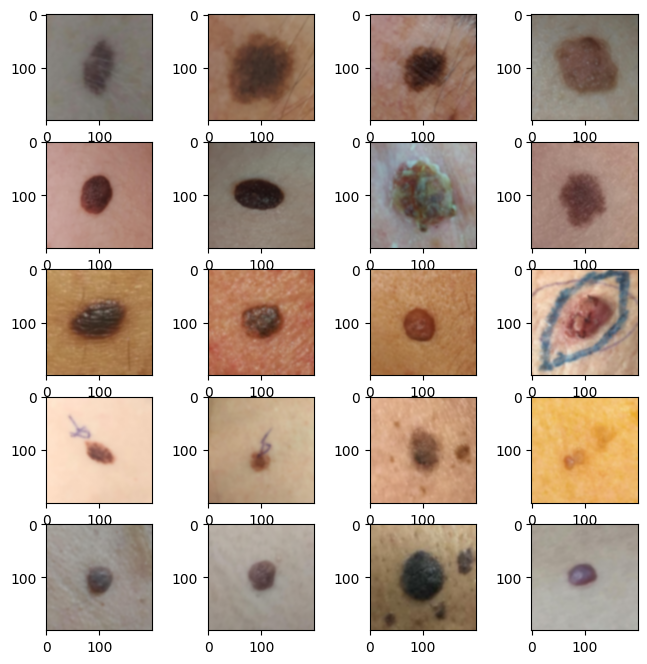

In [5]:
#Gaussian Blur Effect

fig = plt.figure(figsize=(8,8))
cols = 4
rows = 5

for i in range(0, cols*rows):
    img = cv.imread(path_jpg + '/' + img_files[i])
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.GaussianBlur(img, (9,9), 0)
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img)
    print(img_files[i])

plt.show()

PAT_100_393_595.png.jpg
PAT_109_868_113.png.jpg
PAT_109_868_723.png.jpg
PAT_1107_427_352.png.jpg
PAT_1109_436_141.png.jpg
PAT_1109_437_254.png.jpg
PAT_112_168_360.png.jpg
PAT_1138_520_154.png.jpg
PAT_1186_680_578.png.jpg
PAT_1216_759_542.png.jpg
PAT_1217_762_198.png.jpg
PAT_122_185_957.png.jpg
PAT_1245_844_471.png.jpg
PAT_1245_845_32.png.jpg
PAT_1252_866_852.png.jpg
PAT_1269_936_965.png.jpg
PAT_1273_952_89.png.jpg
PAT_1288_1003_969.png.jpg
PAT_1306_1086_124.png.jpg
PAT_1326_1156_139.png.jpg


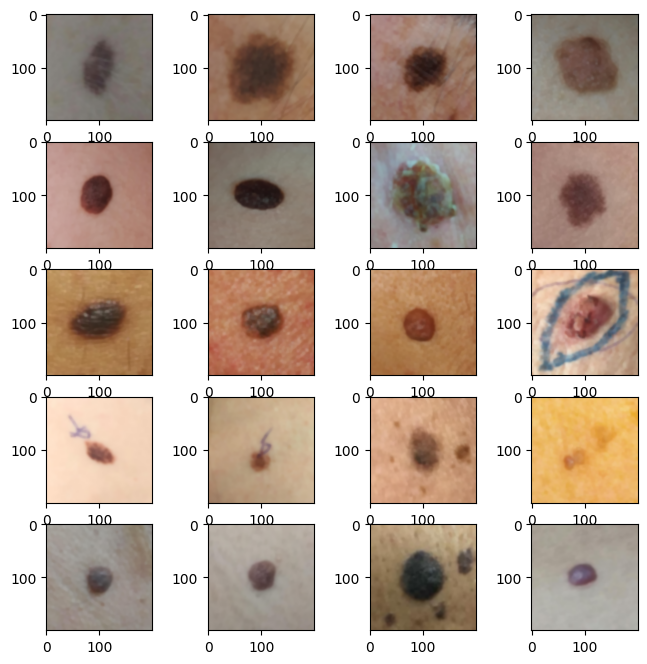

In [6]:
# Morphological Operations

fig = plt.figure(figsize=(8,8))
cols = 4
rows = 5

for i in range(0, cols*rows):
    img = cv.imread(path_jpg + '/' + img_files[i])
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    #Apply the Gaussian Blur
    img_blur = cv.GaussianBlur(img, (9,9), 0)
    
    #Apply the Morphological Opening and Closing Operations
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(img_blur, cv.MORPH_OPEN, kernel)
    img_closed = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(img_closed)
    print(img_files[i])

plt.show()

PAT_100_393_595.png.jpg
PAT_109_868_113.png.jpg
PAT_109_868_723.png.jpg
PAT_1107_427_352.png.jpg
PAT_1109_436_141.png.jpg
PAT_1109_437_254.png.jpg
PAT_112_168_360.png.jpg
PAT_1138_520_154.png.jpg
PAT_1186_680_578.png.jpg
PAT_1216_759_542.png.jpg
PAT_1217_762_198.png.jpg
PAT_122_185_957.png.jpg
PAT_1245_844_471.png.jpg
PAT_1245_845_32.png.jpg
PAT_1252_866_852.png.jpg
PAT_1269_936_965.png.jpg
PAT_1273_952_89.png.jpg
PAT_1288_1003_969.png.jpg
PAT_1306_1086_124.png.jpg
PAT_1326_1156_139.png.jpg


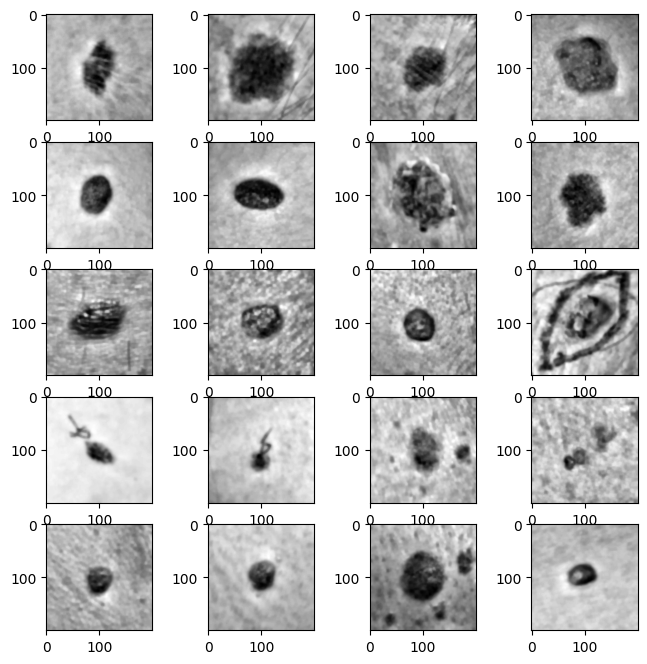

In [8]:
#CLAHE Application

fig = plt.figure(figsize=(8,8))
cols = 4
rows = 5

for i in range(0, cols*rows):
    img = cv.imread(path_jpg + '/' + img_files[i])
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    #Apply the Gaussian Blur
    img_blur = cv.GaussianBlur(img, (9,9), 0)
    
    #Apply the Morphological Opening and Closing Operations
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(img_blur, cv.MORPH_OPEN, kernel)
    img_closed = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
    
    #Apply CLAHE
    gray = cv.cvtColor(img_closed, cv.COLOR_RGB2GRAY)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(gray, cmap='gray')
    print(img_files[i])

plt.show()

PAT_100_393_595.png.jpg
PAT_109_868_113.png.jpg
PAT_109_868_723.png.jpg
PAT_1107_427_352.png.jpg
PAT_1109_436_141.png.jpg
PAT_1109_437_254.png.jpg
PAT_112_168_360.png.jpg
PAT_1138_520_154.png.jpg
PAT_1186_680_578.png.jpg
PAT_1216_759_542.png.jpg
PAT_1217_762_198.png.jpg
PAT_122_185_957.png.jpg
PAT_1245_844_471.png.jpg
PAT_1245_845_32.png.jpg
PAT_1252_866_852.png.jpg
PAT_1269_936_965.png.jpg
PAT_1273_952_89.png.jpg
PAT_1288_1003_969.png.jpg
PAT_1306_1086_124.png.jpg
PAT_1326_1156_139.png.jpg


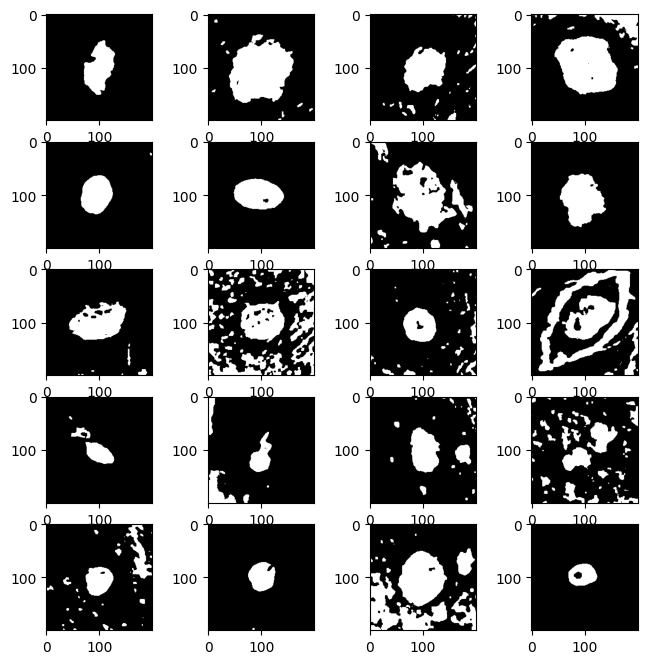

In [9]:
#Thresholding Operation

fig = plt.figure(figsize=(8,8))
cols = 4
rows = 5

for i in range(0, cols*rows):
    img = cv.imread(path_jpg + '/' + img_files[i])
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    #Apply the Gaussian Blur
    img_blur = cv.GaussianBlur(img, (9,9), 0)
    
    #Apply the Morphological Opening and Closing Operations
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(img_blur, cv.MORPH_OPEN, kernel)
    img_closed = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
    
    #Apply CLAHE
    gray = cv.cvtColor(img_closed, cv.COLOR_RGB2GRAY)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    
    # Thresholding operation
    _, threshold = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(threshold, cmap='gray')
    print(img_files[i])

plt.show()

PAT_100_393_595.png.jpg
PAT_109_868_113.png.jpg
PAT_109_868_723.png.jpg
PAT_1107_427_352.png.jpg
PAT_1109_436_141.png.jpg
PAT_1109_437_254.png.jpg
PAT_112_168_360.png.jpg
PAT_1138_520_154.png.jpg
PAT_1186_680_578.png.jpg
PAT_1216_759_542.png.jpg
PAT_1217_762_198.png.jpg
PAT_122_185_957.png.jpg
PAT_1245_844_471.png.jpg
PAT_1245_845_32.png.jpg
PAT_1252_866_852.png.jpg
PAT_1269_936_965.png.jpg
PAT_1273_952_89.png.jpg
PAT_1288_1003_969.png.jpg
PAT_1306_1086_124.png.jpg
PAT_1326_1156_139.png.jpg


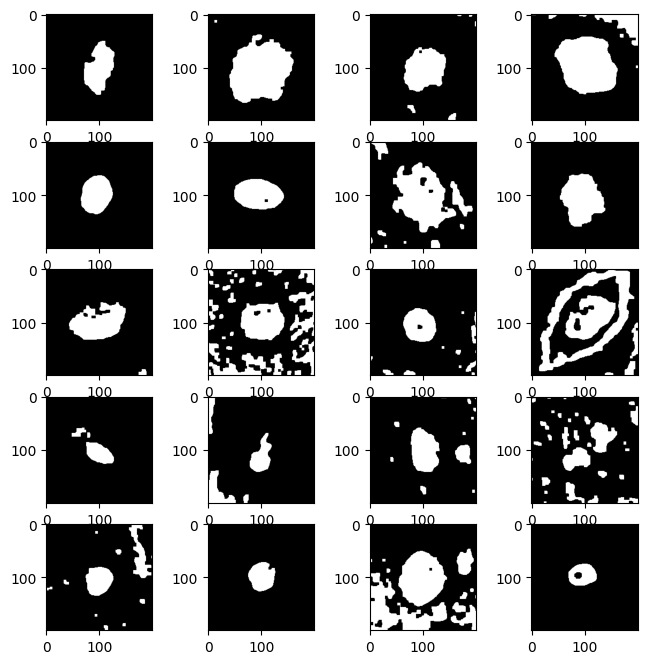

In [10]:
# 2nd Morphological Operation

fig = plt.figure(figsize=(8,8))
cols = 4
rows = 5

for i in range(0, cols*rows):
    img = cv.imread(path_jpg + '/' + img_files[i])
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    #Apply the Gaussian Blur
    img_blur = cv.GaussianBlur(img, (9,9), 0)
    
    #Apply the Morphological Opening and Closing Operations
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(img_blur, cv.MORPH_OPEN, kernel)
    img_closed = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
    
    #Apply CLAHE
    gray = cv.cvtColor(img_closed, cv.COLOR_RGB2GRAY)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    
    # Thresholding operation
    _, threshold = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    
    # Morphological Opening and Closing
    kernel_2 = np.ones((5,5),np.uint8)
    opening_thresh = cv.morphologyEx(threshold, cv.MORPH_OPEN, kernel_2)
    threshold_closed = cv.morphologyEx(opening_thresh, cv.MORPH_CLOSE, kernel_2)
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(threshold_closed, cmap='gray')
    print(img_files[i])

plt.show()

PAT_100_393_595.png.jpg
PAT_109_868_113.png.jpg
PAT_109_868_723.png.jpg
PAT_1107_427_352.png.jpg
PAT_1109_436_141.png.jpg
PAT_1109_437_254.png.jpg
PAT_112_168_360.png.jpg
PAT_1138_520_154.png.jpg
PAT_1186_680_578.png.jpg
PAT_1216_759_542.png.jpg
PAT_1217_762_198.png.jpg
PAT_122_185_957.png.jpg
PAT_1245_844_471.png.jpg
PAT_1245_845_32.png.jpg
PAT_1252_866_852.png.jpg
PAT_1269_936_965.png.jpg
PAT_1273_952_89.png.jpg
PAT_1288_1003_969.png.jpg
PAT_1306_1086_124.png.jpg
PAT_1326_1156_139.png.jpg


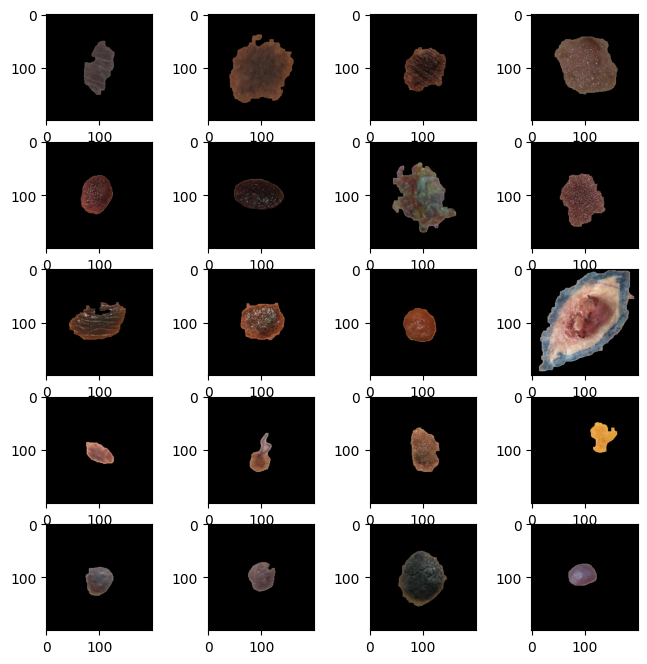

In [11]:
# Contour Detection and Drawing of Largest Contour

fig = plt.figure(figsize=(8,8))
cols = 4
rows = 5

for i in range(0, cols*rows):
    img = cv.imread(path_jpg + '/' + img_files[i])
    img = cv.resize(img, (200, 200))  # Resize the image to fit in a 200x200 cell
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    #Apply the Gaussian Blur
    img_blur = cv.GaussianBlur(img, (9,9), 0)
    
    #Apply the Morphological Opening and Closing Operations
    kernel = np.ones((3,3),np.uint8)
    opening = cv.morphologyEx(img_blur, cv.MORPH_OPEN, kernel)
    img_closed = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel)
    
    #Apply CLAHE
    gray = cv.cvtColor(img_closed, cv.COLOR_RGB2GRAY)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    gray = clahe.apply(gray)
    
    # Thresholding operation
    _, threshold = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    
    # Morphological Opening and Closing
    kernel_2 = np.ones((5,5),np.uint8)
    opening_thresh = cv.morphologyEx(threshold, cv.MORPH_OPEN, kernel_2)
    threshold_closed = cv.morphologyEx(opening_thresh, cv.MORPH_CLOSE, kernel_2)
    
    # Find Contours
    contours, _ = cv.findContours(threshold_closed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    #Sort the Contours and Define the largest one by areas        
    sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)
    # Define the empty mask for contours
    mask = np.zeros(gray.shape, np.uint8)
    # Draw the contours on top of the mask, take the largest five
    cv.drawContours(mask, sorted_contours, 0, (255, 255, 255), -1)
    
    # Apply the mask to the original lesion image
    result = cv.bitwise_and(img, img, mask=mask)
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(result)
    print(img_files[i])

plt.show()